In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv", index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


In [26]:
len(df)

7278

In [27]:
housing = df[df['district'] == "Чиланзарский"]
housing.head(3)

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


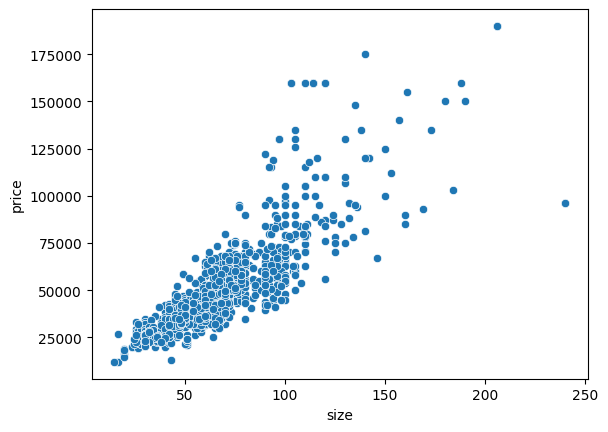

In [30]:
# plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x=housing['size'], y=housing['price'])
plt.show()

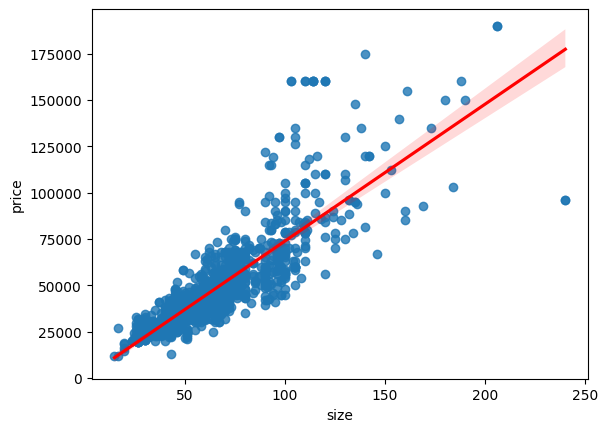

In [34]:
sns.regplot(data=housing, x='size', y='price', line_kws={'color':'red'})
plt.show()

In [35]:
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [36]:
LR_model = LinearRegression()

In [47]:
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])
x_train

array([[ 58.],
       [180.],
       [ 38.],
       ...,
       [ 67.],
       [ 47.],
       [ 68.]])

In [46]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [48]:
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f'{theta1 = }')
print(f'{theta0 = }')

theta1 = 732.7784051414766
theta0 = 106.31843170110369


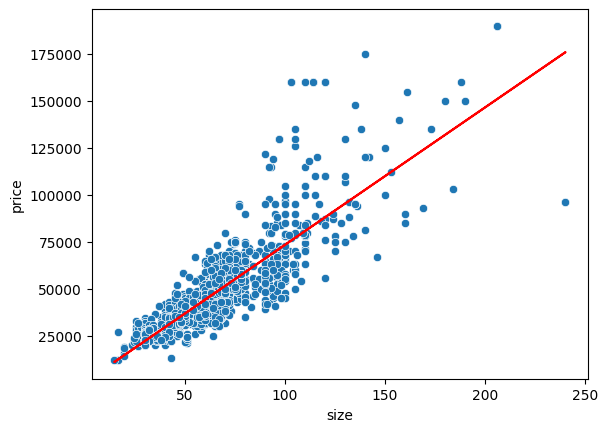

In [51]:
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train+theta0, '-r')
plt.show()

In [52]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [53]:
y_predicted = LR_model.predict(x_test)

In [61]:
MAE = mean_absolute_error(y_test, y_predicted)
RMSE = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f'{MAE = }')
print(f'{RMSE = }')

MAE = 7269.709648262382
RMSE = 12734.803748258666
